In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as f
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from sklearn import preprocessing
from tqdm import tqdm

In [131]:
train = pd.read_csv('./dataset/train_data.csv')
test = pd.read_csv('./dataset/test_data.csv')

In [132]:
train_org=train.copy()
test_org=test.copy()

In [222]:
train_org['climateregions__climateregion'].isnull().sum()

0

In [137]:
len(train.columns)

246

In [138]:
# train = train_org
# test = test_org

In [139]:
climateregions = train['climateregions__climateregion'].unique()

In [140]:
null_col_list = ['nmme0-prate-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm30', 'ccsm30', 'nmme0-prate-56w__ccsm30', 'nmme-tmp2m-56w__ccsm3', 'nmme-prate-56w__ccsm3', 'nmme-tmp2m-34w__ccsm3', 'nmme-prate-34w__ccsm3']

In [141]:

for col in null_col_list:
    mean = (train[col].mean() * (len(train) - train[col].isnull().sum()) + test[col].mean()* (len(test) - test[col].isnull().sum())) / (len(train) + len(test) - train[col].isnull().sum() - test[col].isnull().sum())
    train[col] = train[col].fillna(mean)
    

In [9]:
# nonNumbericCols = []
# for col in train.columns:
#     if train[col].dtypes == 'object':
#         nonNumbericCols.append(col)

# print(nonNumbericCols)

['startdate', 'climateregions__climateregion']


In [142]:
region_map = dict()
for i, col in enumerate(train['climateregions__climateregion'].unique()):
    region_map[col] = i
# region_map

In [143]:
train['climateregions__climateregion'] = train['climateregions__climateregion'].map(region_map)
test['climateregions__climateregion'] = test['climateregions__climateregion'].map(region_map)

In [144]:
train=train.drop(['index'],axis=1)
# test=test.drop(['index'],axis=1)

In [13]:
# def plot_distribution(var):
#     plt.subplots(figsize=(14,7))
#     sns.distplot(x=train[var], color='blue', kde=True)
#     sns.distplot(x=test[var], color='red', kde=True)
#     plt.title(var, weight="bold",fontsize=20, pad=20)
#     plt.ylabel("Count", weight="bold", fontsize=15)
#     plt.xlabel(var, weight="bold", fontsize=12)
#     plt.savefig('{}.png'.format(var))
#     plt.show()

In [14]:
# for col in train.columns:
#     if col != 'startdate' and col != 'contest-tmp2m-14d__tmp2m':
#         plot_distribution(col)
    

In [145]:
train['year']=pd.DatetimeIndex(train['startdate']).year 
train['month']=pd.DatetimeIndex(train['startdate']).month 
train['day']=pd.DatetimeIndex(train['startdate']).day
test['year']=pd.DatetimeIndex(test['startdate']).year 
test['month']=pd.DatetimeIndex(test['startdate']).month 
test['day']=pd.DatetimeIndex(test['startdate']).day

In [155]:
train['year']=train['year'] - 1
train['month']=train['month'] - 1 
train['day']=train['day'] - 1
test['year']=test['year'] - 1 
test['month']=test['month'] - 1 
test['day']=test['day'] - 1

In [147]:
train=train.drop(['startdate'],axis=1)
test=test.drop(['startdate'],axis=1)

In [165]:
target="contest-tmp2m-14d__tmp2m"
temporal_attrs = ['year', 'month', 'day']
spatial_attrs = ['lat', 'lon', 'climateregions__climateregion']
feature_attrs = [feat for feat in train.columns if feat != target and feat not in temporal_attrs and feat not in spatial_attrs]

In [182]:
def scaleColumns(df, scaler, cols_to_scale):
    for col in tqdm(cols_to_scale):
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [183]:
scaler = preprocessing.MinMaxScaler()
train[feature_attrs] = scaleColumns(train[feature_attrs], scaler, feature_attrs)

  0%|                                                                                              | 0/240 [00:00<?, ?it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
 13%|███████████▏                                                                        | 32/240 [00:00<00:01, 156.67it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

 21%|█████████████████▌                                                                  | 50/240 [00:00<00:01, 162.98it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
 35%|█████████████████████████████▍                                                      | 84/240 [00:00<00:00, 161.13it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

 42%|██████████████████████████████████▉                                                | 101/240 [00:00<00:00, 160.58it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
 62%|███████████████████████████████████████████████████▉                   

 69%|█████████████████████████████████████████████████████████▍                         | 166/240 [00:01<00:00, 151.08it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel

In [188]:
scaler = preprocessing.MinMaxScaler()
test[feature_attrs] = scaleColumns(test[feature_attrs], scaler, feature_attrs)

  0%|                                                                                              | 0/240 [00:00<?, ?it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

 15%|████████████▌                                                                       | 36/240 [00:00<00:00, 352.31it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
 30%|█████████████████████████▏                                             

 45%|█████████████████████████████████████▎                                             | 108/240 [00:00<00:00, 354.68it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
 60%|█████████████████████████████████████████████████▊                                 | 144/240 [00:00<00:00, 355.49it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

 75%|██████████████████████████████████████████████████████████████▎                    | 180/240 [00:00<00:00, 356.45it/s]/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel

100%|███████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 351.51it/s]


In [215]:
mu, sigma = 0, 1e-3
noise = np.random.normal(mu, sigma, train.shape[0]) 

In [216]:
for col in feature_attrs:
    noise = np.random.normal(mu, sigma, train.shape[0]) 
    train[col] = train[col] + noise

In [218]:
for col in feature_attrs:
    noise = np.random.normal(mu, sigma, test.shape[0]) 
    test[col] = test[col] + noise

In [219]:
train.to_csv('./train1.csv', index=False)
test.to_csv('./test1.csv', index=False)

In [226]:
t = pd.read_csv('test_training.csv')
t.columns

Index(['year', 'month', 'day', 'lat', 'lon', 'climateregions__climateregion',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       ...
       'wind-vwnd-925-2010-12', 'wind-vwnd-925-2010-13',
       'wind-vwnd-925-2010-14', 'wind-vwnd-925-2010-15',
       'wind-vwnd-925-2010-16', 'wind-vwnd-925-2010-17',
       'wind-vwnd-925-2010-18', 'wind-vwnd-925-2010-19',
       'wind-vwnd-925-2010-20', 'contest-tmp2m-14d__tmp2m'],
      dtype='object', length=247)

In [220]:
test1 = pd.read_csv('test1.csv')
train1 = pd.read_csv('train1.csv')

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-9

In [297]:
final_res = np.array([0 for _ in range(len(test1))])

for i in range(34):
    if i not in error_list:
        result = pd.read_csv('submission_{}.csv'.format(i))
        submisstion = test1.merge(result, how='inner', on='index')
        final_res =  final_res + np.array(submisstion['contest-tmp2m-14d__tmp2m'].tolist())

final_res = final_res / (34 - len(error_list))
    
df = pd.DataFrame(list(zip(final_res, test1['index'].tolist())),
           columns =['contest-tmp2m-14d__tmp2m', 'index'])
df.to_csv('final_submission.csv', index=False)

In [366]:
result = pd.read_csv('submission_49.csv')
print(result.shape)
result.head()

(31354, 2)


,contest-tmp2m-14d__tmp2m,index
0,8.045366,384060
1,-1.661088,399375
2,16.663160,382208
3,1.947408,393281
4,9.546947,379438


In [367]:
submisstion = test1.merge(result, how='inner', on='index')

In [368]:
submisstion[['contest-tmp2m-14d__tmp2m', 'index']].to_csv('final_submission.csv', index=False)

In [369]:
(submisstion[['contest-tmp2m-14d__tmp2m', 'index']]['index'] == test1['index']).sum()

31354

In [370]:
submisstion[['contest-tmp2m-14d__tmp2m', 'index']]

,contest-tmp2m-14d__tmp2m,index
0,24.870100,375734
1,24.860516,375735
2,24.753935,375736
3,24.618969,375737
4,24.750711,375738
...,...,...
31349,-2.619195,407083
31350,-2.627500,407084
31351,-2.502543,407085
31352,-1.044393,407086


In [371]:
best = np.array(pd.read_csv('best.csv')['contest-tmp2m-14d__tmp2m'].tolist())
self = np.array(submisstion[['contest-tmp2m-14d__tmp2m', 'index']]['contest-tmp2m-14d__tmp2m'].tolist())

In [372]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(best, self)/(norm(best)*norm(self))
print(cos_sim)

0.9766243140749149


<AxesSubplot:xlabel='epoch'>

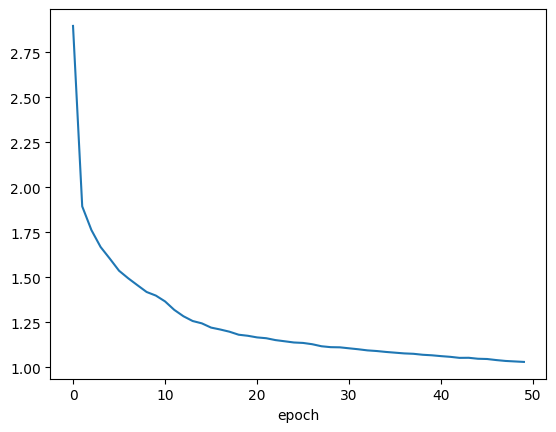

In [373]:
logs = pd.read_csv('train_log.csv')
logs.groupby(['epoch'])['loss'].mean().plot()

In [377]:
t = pd.read_csv('test_preprocessing.csv')
result = pd.read_csv('./simple_nn/submission_199.csv')
print(result.shape)
result.head()

submisstion = t.merge(result, how='inner', on='index')
submisstion[['contest-tmp2m-14d__tmp2m', 'index']].to_csv('./simple_nn/final_submission.csv', index=False)
(submisstion[['contest-tmp2m-14d__tmp2m', 'index']]['index'] == t['index']).sum()

(31354, 2)


31354